The code implements the kernel two sample test from the paper
> Gretton, A., Borgwardt, K. M., Rasch, M. J., Schölkopf, B., & Smola, A. (2012). A kernel two-sample test. Journal of Machine Learning Research, 13(Mar), 723-773.

Suppose we have observed $d$-dimensional $x_1, \cdots, x_m\in\mathbb{R}^d$ following the distribution of a random variable $X\sim p$. In addition, we  observe another group of observations $y_1, \cdots, y_n\in\mathbb{R}^d$ which follow the distribution of a random variable $Y\sim q$. The work of Gretton (2012) tests the whether the distributions of $X$ and $Y$ are the same by computing the ***maximum mean discrepancy (MMD)***
$$
\text{MMD}^2[\mathcal{F}, p,q] = \sup_{f\in\mathcal{F}} \big(\mathbb{E}_X f(X) - \mathbb{E}_Y f(Y) \big).
$$
The above supremum searches a function $f$ in the reproducing kernel Hilbert space $\mathcal{F}$. This function maximizes the difference between the two expections. Intuitively, greater discrepancy between the two distributions will result in larger value of MMD. The optimal function $f^*$ achieving the supremum of MMD is called the ***witness function***. It helps to visualize the difference between two distributions in the code below.

The paper presents a equivalent representation of MMD by the kernel $k(\cdot, \cdot)$ of $\mathcal{F}$. 
$$
\text{MMD}^2[\mathcal{F}, p,q] = \mathbb{E}_{X,X'} k(X,X') +  \mathbb{E}_{Y,Y'} k(Y,Y') - 
2\mathbb{E}_{X,Y} k(X,Y).
$$
To compute the value of MMD, sample averages of kernel are used in the places of the above expectations.



## Example 1

Basic setup:

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from astropy.io import fits
from scipy import stats

def readData(filePath):
    ffile = fits.open(filePath)
    u1 = ffile[1].data['u']
    g1 = ffile[1].data['g']
    r1 = ffile[1].data['r']
    i1 = ffile[1].data['i']
    z1 = ffile[1].data['z']
    ds1 = np.vstack((u1,g1,r1,i1,z1)).T
    sel = np.sum(np.abs(ds1) == 99,1) == 0
    data = ds1[sel,:]
    ffile.close()
    return data


Read two data sets from 
>      Zhou. et al.(2019) Deep ugrizY Imaging and DEEP2/3 Spectroscopy ....

We will compare the difference between the two datasets, `ds1` and `ds2`. 
The loaded numpy arrays contain the $ugriz$ magnitude with missing values removed.

In [2]:
ds1 = readData("./data/3D-HST_Terapix_Wide_Subaru_v1.fits")
ds2 = readData("./data/DEEP2_uniq_Terapix_Wide_Subaru_v1.fits")

In [3]:
# load the test module
import kernelCompare as kc
# create an object by passing in the two datasets for comparision
obj = kc.kernelCompare(ds1, ds2)

The method `compute(iterations=1000)`  computes the value of maximum mean discrepancy (MMD) as well as its p-value. The p-value is computed by permuting and mixing the two datsets. Each iteration of permutation will produce a MMD value. The p-value is the percentage of iterations whose MMD value is larger than the MMD value from the actual (un-permuted) dataset. 

- Larger MMD value implies greater discrepancy between the two datasets.
- The estimated MMD value could be negative.
- The parameter `iterations` specify the total number of  permutations.

The result below shows the difference between the two distributios is significant (p value is 0.001).

In [4]:
MMD, pValue = obj.compute(iterations=1000)
print("MMD statistics is %f" % MMD)
print("The p-value of the test is %f" % pValue)

100% (1000 of 1000) |####################| Elapsed Time: 0:00:14 Time:  0:00:14


MMD statistics is 0.110466
The p-value of the test is 0.001000


-



The difference between the two datasets can be visualized by the method `plotDiff(coord1, coord2)`.


In fact, the code below plots the witness function $f^*(z)$ along $(z_0, z_1)$ specified by `coord1=0` 
`coord2=1`. The  two coordiates $(z_0, z_1)$ vary with all possible values
(i.e., for the magnitude values of $ug$). The other coordinates `z[2]`, `z[3]` and `z[4]` (for the magntitude values of $riz$) are fixed at the mean value of the datasets. In this way, the value of the function $f^*(z)$ is plotted.

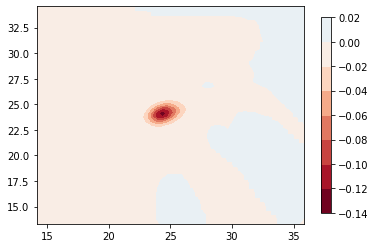

In [5]:
obj.plotDiff(coord1 = 0, coord2 = 1)

In this plot, the red reigions (with negative values) indicate  where the first dataset has *less* data points than the second dataset. The blue regions (with positive values) indicate  where the first dataset has *more* data points than the first dataset.

In the center of the plot above, the abosolute value of $-0.14$ is relatively large. It's significant that the second datsets is denser in the center. 

## Example 2
We apply the method on another two datasets. We find the difference between the two dataset is not significant (p-value is 1).

In [6]:
ds1 = readData("./data/DEEP2_uniq_Terapix_Subaru_v1.fits")
ds2 = readData("./data/DEEP2_uniq_Terapix_Wide_Subaru_v1.fits")
obj = kc.kernelCompare(ds1,ds2)
MMD2, pValue = obj.compute(1000)
print("MMD2 statistics is %f" % MMD2)
print("The p-value of the test is %d" % pValue)

100% (1000 of 1000) |####################| Elapsed Time: 0:00:22 Time:  0:00:22


MMD2 statistics is -0.138357
The p-value of the test is 1


For these two datasets, we plot their difference along $(z_3, z_4)$ specified by `coord1=3` 
`coord2=4`. We find in the center of the plot, there is a blue region taking positive values. 
However, the value is only $0.015$. This means the first dataset has slightly more points in the center.

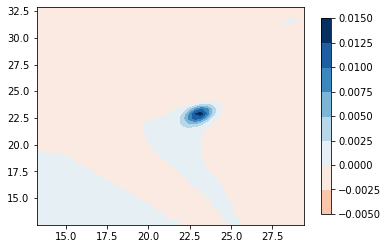

In [7]:
obj.plotDiff(coord1 = 3, coord2 =4)